YF.download() has changed argument auto_adjust default to True


C:\Users\narla\AppData\Local\Temp\ipykernel_14496\3842108599.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\narla\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - loss: 0.0015 
Epoch 2/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 73s 24ms/step - loss: 2.5081e-04 
Epoch 3/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - loss: 1.9483e-04 
Epoch 4/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 68s 23ms/step - loss: 1.4843e-04
Epoch 5/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - loss: 1.0722e-04 
Epoch 6/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 73s 24ms/step - loss: 9.7037e-05 
Epoch 7/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 89s 27ms/step - loss: 8.3487e-05 
Epoch 8/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 72s 24ms/step - loss: 8.4440e-05 
Epoch 9/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - loss: 8.4549e-05 
Epoch 10/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 84s 23ms/step - loss: 6.1389e-05 
Epoch 11/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 70s 23ms/step - loss: 8.7556e-05 
Epoch 12/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 77s 22ms/step - loss: 6.1079e-05 
Epoch 13/20
2975/2975 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - loss: 6.3064e-05
Epoch 14/20
29

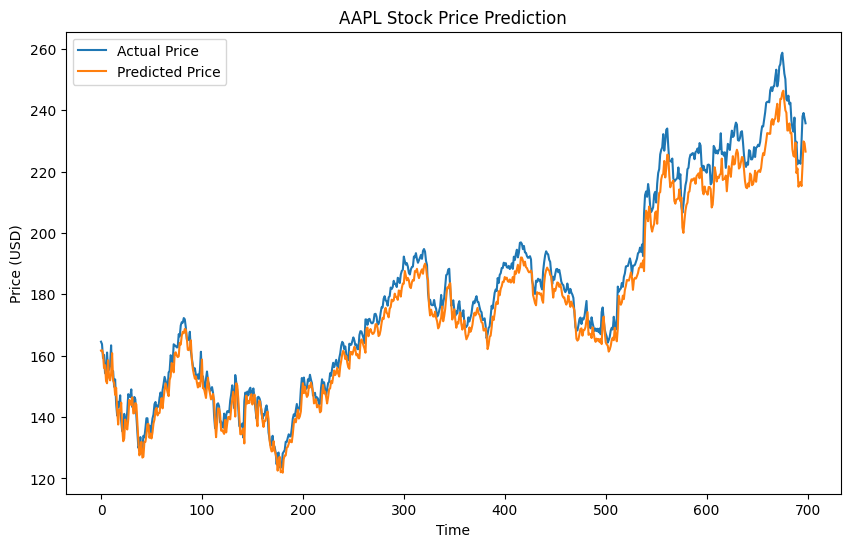

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import yfinance as yf
data=yf.download('AAPL',start='2010-01-01',end='2025-02-02',progress=False)
data.reset_index(inplace=True)
data['Date']=pd.to_datetime(data['Date'])
df=data[['Date','Close']]
df.set_index('Date',inplace=True)
df.dropna(inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df)
train_size=int(len(scaled_data)*0.8)
train_data,test_data=scaled_data[:train_size],scaled_data[train_size:]
def create_xy(data,n_steps):
    x,y=[],[]
    for i in range(len(data)-n_steps):
        x.append(data[i:i+n_steps,0])
        y.append(data[i+n_steps,0])
    return np.array(x),np.array(y)
n_steps=60
x_train,y_train=create_xy(train_data,n_steps)
x_test,y_test=create_xy(test_data,n_steps)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=20) 
predictions=model.predict(x_test)
y_test_inv=scaler.inverse_transform(np.reshape(y_test,(-1,1)))
predictions_inv=scaler.inverse_transform(np.reshape(predictions,(-1,1)))
plt.figure(figsize=(10,6))
plt.plot(y_test_inv,label='Actual Price')
plt.plot(predictions_inv,label='Predicted Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()